In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Bio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Настройка стиля для графиков
sns.set(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.8 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/final_data_before_getting_descriptors.csv')
data[['siRNA concentration', 'Duration after transfection', 'Efficacy, %']].corr()

,siRNA concentration,Duration after transfection,"Efficacy, %"
siRNA concentration,1.000000,0.028236,-0.013645
Duration after transfection,0.028236,1.000000,-0.108588
"Efficacy, %",-0.013645,-0.108588,1.000000


In [ ]:
data

,SMDBid,Sense,AntiSense,"Concentration, nM",Experiment used to check activity,Target gene,siRNA concentration,Cell or Organism used,Transfection method,Duration after transfection,"Efficacy, %"
0,SM5317,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(OC)C3"",...",10,19,38,10.0,11,19,24.0,40.77
1,SM5316,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...",10,19,38,10.0,11,19,24.0,42.17
2,SM5315,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10,19,38,10.0,11,19,24.0,44.11
3,SM5314,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10,19,38,10.0,11,19,24.0,65.16
4,SM5313,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10,19,38,10.0,11,19,24.0,60.40
...,...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,"[""Nc1nc2N(C3COC(CO)C(OP(=O)(O)OP(=O)(O)OP(=O)(...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,81.40
3431,SM0004,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,35.40
3432,SM0003,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,54.20
3433,SM0002,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,76.80


### 1. Анализ распределения длин сиквенсов

#### Функция для расчета длины последовательностей

In [ ]:
def calculate_sequence_lengths(df, seq_column):
    """
    Функция для расчета длин последовательностей в указанной колонке.
    """
    df[f'{seq_column}_length'] = df[seq_column].apply(lambda x: x.count(',') + 1)
    return df

#### Функция для визуализации распределения длин

In [ ]:
def plot_sequence_length_distribution(df, seq_column, name):
    """
    Функция для построения гистограммы и бокс-плота распределения длин последовательностей.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'{seq_column}_length')
    # Гистограмма
    variable = df[x].fillna(df[x].mean())
    sns.histplot(variable, kde=False, alpha=.5, ax=ax, binwidth = 1)
    des = df[x].describe()
    ax.tick_params(axis='both', labelsize=20)
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)
    # Бокс-плот (inset)
    ax_inset = plt.gca().inset_axes([0.66, 0.5, 0.34, 0.4])
    sns.boxplot(df[f'{seq_column}_length'], ax=ax_inset, boxprops=dict(alpha=.5))
    ax_inset.set_ylabel(f'', fontsize=17)
    ax_inset.tick_params(axis='both', labelsize=23)
    ax_inset.set_title("")
    ax_inset.grid(False)
    plt.title(f'')
    plt.xlabel('Sequence Length', fontsize=25)
    plt.ylabel('Frequency', fontsize=25)
    plt.savefig(f'{name}', dpi=1200)
    plt.show()

### 2. Анализ GC-состава

#### Функция для расчета GC-состава

In [ ]:
def calculate_gc_content(df, seq_column):
    """
    Функция для расчета GC-состава последовательностей в указанной колонке.
    """
    df[f'{seq_column} GC content'] = df[seq_column].apply(gc_fraction)
    return df



#### Функция для визуализации распределения GC-состава

In [ ]:
def plot_gc_content_distribution(df, seq_column, name):
    """
    Функция для построения гистограммы распределения GC-состава последовательностей.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'{seq_column} GC content')
    # Гистограмма
    variable = df[x].fillna(df[x].mean())
    sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 0.03)
    des = df[x].describe()
    ax.tick_params(axis='both', labelsize=20)
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)

    # Бокс-плот (inset)
    ax_inset = plt.gca().inset_axes([0.0, 0.7, 0.3, 0.3])
    ax_inset.yaxis.tick_right()
    ax_inset.yaxis.set_label_position("right")
    sns.boxplot(df[f'{seq_column} GC content'], ax=ax_inset, boxprops=dict(alpha=.5))
    ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=20)
    ax_inset.set_ylabel(f'{seq_column} GC content', fontsize=20)
    ax_inset.tick_params(axis='both', labelsize=20)
    ax_inset.grid(False)
    ax_inset.set_title("")

    plt.title(f'')
    plt.xlabel('GC Content', labelsize=20)
    plt.ylabel('Frequency', labelsize=20)

    plt.savefig(f'{name}', dpi=1000)
    plt.show()



### 3. Анализ длины комплементарных участков

#### Функция для расчета длины комплементарных участков

In [ ]:
def calculate_complementary_region_length(seq1, seq2):
    """
    Функция для расчета длины комплементарных участков между двумя последовательностями.
    """
    seq1 = Seq(seq1)
    seq2 = Seq(seq2)

    # Определение длины самой длинной комплементарной последовательности
    length = min(len(seq1), len(seq2.reverse_complement()))

    return length


#### Функция для расчета комплементарных участков для всего датафрейма

In [ ]:
def calculate_complementary_regions(df, seq_column_1, seq_column_2):
    """
    Функция для расчета длин комплементарных участков между двумя колонками с последовательностями.
    """
    df['complementary_region_length'] = df.apply(
        lambda row: calculate_complementary_region_length(row[seq_column_1], row[seq_column_2]), axis=1)
    return df


#### Функция для визуализации распределения длины комплементарных участков

In [ ]:
def plot_complementary_region_distribution(df, name):


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'complementary_region_length')
    # Гистограмма
    variable = df['complementary_region_length']
    sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 1)
    des = df[x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)

    # Бокс-плот (inset)
    #ax_inset = plt.gca().inset_axes([0.0, 0.7, 0.3, 0.3])
    #sns.boxplot(variable, ax=ax_inset)
    #ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=10)
    #ax_inset.set_ylabel(f'Complementary Region Length', fontsize=10)
    #ax_inset.grid(False)
    #ax_inset.set_title("")

    plt.title(f'')
    plt.xlabel('Complementary Region Length')
    plt.ylabel('Frequency')
    plt.savefig(f'{name}', dpi=1000)
    plt.show()


### 4. Основная функция для запуска анализа

In [ ]:
def sequence_analysis(df, seq_column_1='Sense', seq_column_2='Antisense'):
    """
    Основная функция для выполнения всего анализа последовательностей.
    """
    # Анализ длины последовательностей
    df = calculate_sequence_lengths(df, seq_column_1)
    df = calculate_sequence_lengths(df, seq_column_2)
    plot_sequence_length_distribution(df, seq_column_1)
    plot_sequence_length_distribution(df, seq_column_2)

    # Анализ GC-состава
    df = calculate_gc_content(df, seq_column_1)
    df = calculate_gc_content(df, seq_column_2)
    plot_gc_content_distribution(df, seq_column_1)
    plot_gc_content_distribution(df, seq_column_2)

    # Анализ комплементарных участков
    df = calculate_complementary_regions(df, seq_column_1, seq_column_2)
    plot_complementary_region_distribution(df)

    return df


### Анализ

In [ ]:
pd.read_csv("/content/final_data_before_getting_descriptors.csv")

,SMDBid,Sense,AntiSense,"Concentration, nM",Experiment used to check activity,Target gene,siRNA concentration,Cell or Organism used,Transfection method,Duration after transfection,"Efficacy, %"
0,SM5317,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(OC)C3"",...",10,19,38,10.0,11,19,24.0,40.77
1,SM5316,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...",10,19,38,10.0,11,19,24.0,42.17
2,SM5315,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10,19,38,10.0,11,19,24.0,44.11
3,SM5314,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10,19,38,10.0,11,19,24.0,65.16
4,SM5313,"[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)CC3"", ""Nc...","[""C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C3"", ...",10,19,38,10.0,11,19,24.0,60.40
...,...,...,...,...,...,...,...,...,...,...,...
3430,SM0005,"[""Nc1nc2N(C3COC(CO)C(OP(=O)(O)OP(=O)(O)OP(=O)(...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,81.40
3431,SM0004,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,35.40
3432,SM0003,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,54.20
3433,SM0002,"[""Nc1nc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C...","[""Nc1ncnc2N(C3OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O...",10,15,11,10.0,8,2,72.0,76.80


In [ ]:
import pandas as pd

df = pd.read_csv("/content/final_data_before_getting_descriptors.csv")
seq_column_1, seq_column_2 = "Sense", "AntiSense"

# result_df = sequence_analysis(df)

Efficacy plot

<ipython-input-25-386adccd7683>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=16)


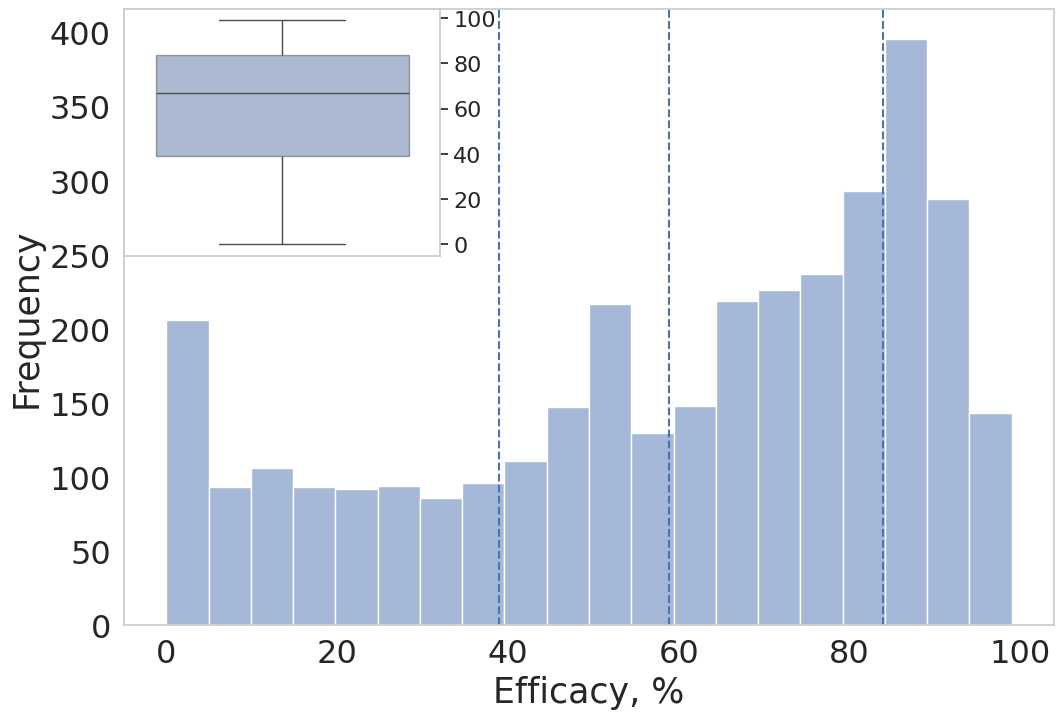

In [ ]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'Efficacy, %')
    # Гистограмма
    variable = df[x].fillna(df[x].mean())
    sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 5)
    des = df[x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)

    ax.tick_params(axis='both', labelsize=23)
    # Бокс-плот (inset)
    ax_inset = plt.gca().inset_axes([0., 0.6, 0.34, 0.4])

    sns.boxplot(df[f'Efficacy, %'], ax=ax_inset, boxprops=dict(alpha=.5))
    ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=16)
    ax_inset.yaxis.set_label_position("right")
    ax_inset.yaxis.tick_right()
    ax_inset.set_ylabel(f'', fontsize=19)
    ax_inset.grid(False)
    ax_inset.set_title("")

    plt.title(f'')
    plt.xlabel('Efficacy, %' , fontsize=25)
    plt.ylabel('Frequency' , fontsize=25)

    plt.savefig(f'Efficacy, %', dpi=1000)
    plt.show()

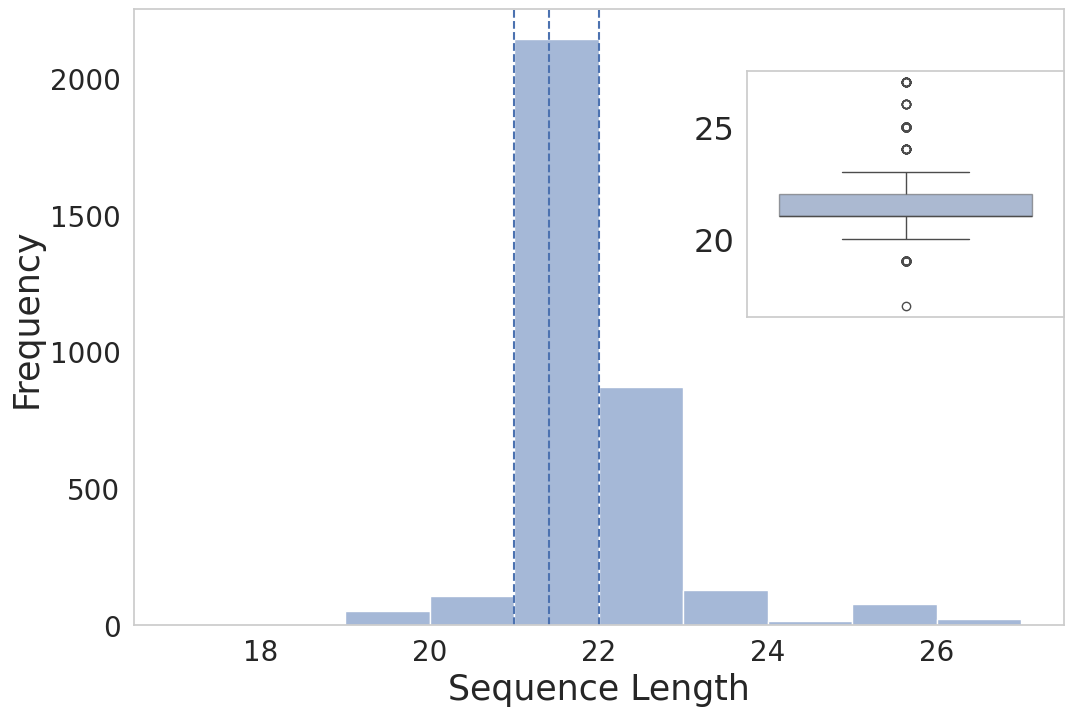

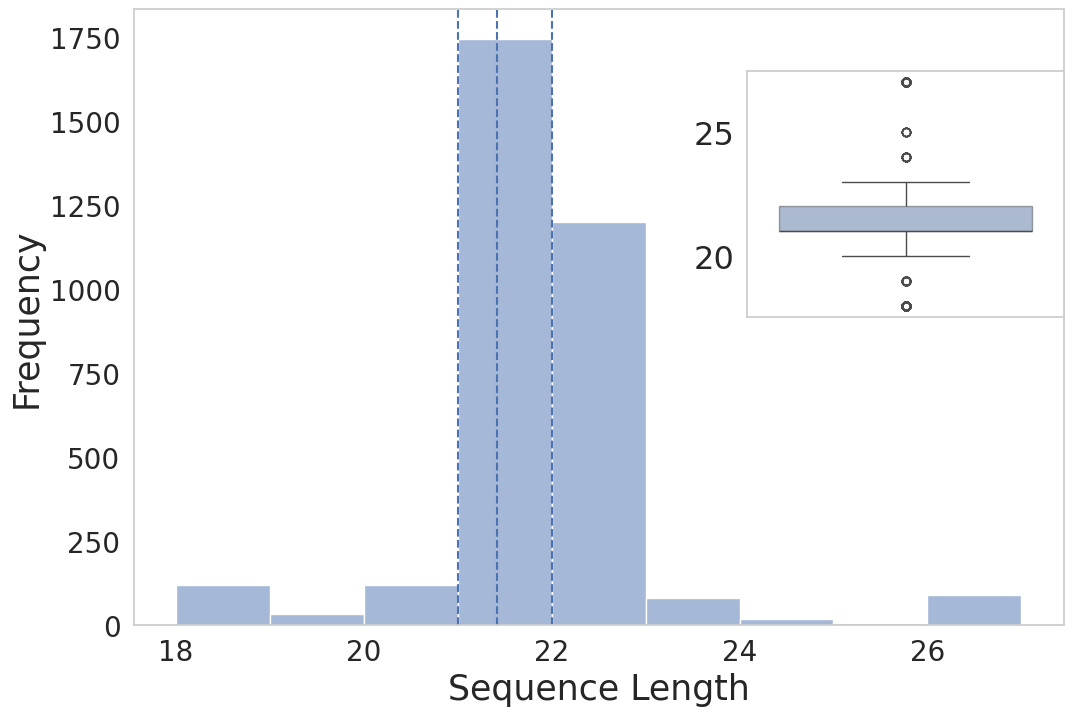

In [ ]:
# Анализ длины последовательностей
df = calculate_sequence_lengths(df, seq_column_1)
df = calculate_sequence_lengths(df, seq_column_2)
#plots_sequence_length_distribution(df, 'seq_column_1', 'seq_column_2')
plot_sequence_length_distribution(df, seq_column_1, 'sense_length.png')
plot_sequence_length_distribution(df, seq_column_2, 'antisense_length.png')

In [ ]:
df = pd.read_csv("/content/final_data_before_getting_descriptors.csv")

df = df.dropna()
seq_column_1, seq_column_2 = "Sense", "AntiSense"

Concentration plot

<ipython-input-39-6948216a0022>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=14)


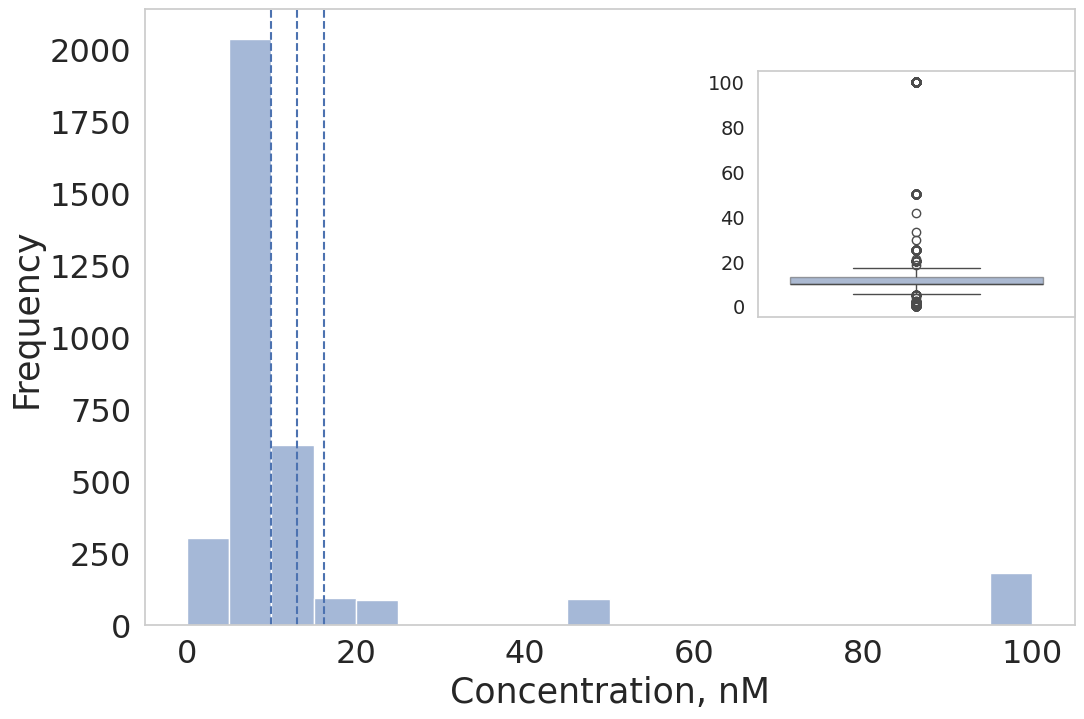

In [ ]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'Concentration, nM')
    # Гистограмма
    variable = df[x].fillna(df[x].mean())
    sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 5)
    des = df[x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=23)
    # Бокс-плот (inset)
    ax_inset = plt.gca().inset_axes([0.66, 0.5, 0.34, 0.4])

    sns.boxplot(df[f'Concentration, nM'], ax=ax_inset, boxprops=dict(alpha=.5))
    ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=14)
    ax_inset.set_ylabel(f'', fontsize=17)
    ax_inset.grid(False)
    ax_inset.set_title("")

    plt.title(f'')
    plt.xlabel('Concentration, nM' , fontsize=25)
    plt.ylabel('Frequency' , fontsize=25)

    plt.savefig(f'Concentration, nM', dpi=1000)
    plt.show()

In [ ]:
data = pd.read_excel('/content/siRNAmod_db_parsed_concs.xlsx')
data = data[data['SMDBid'].isin(df['SMDBid'])]
seq_column_1, seq_column_2 = "siRNA sense", "siRNA antisense"
data

,SMDBid,Field1_links,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration,Efficacy,Trust,Reference,Field8_links
12,SM5317,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Methoxy...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,14,15,16,17,18 * 2,7,10,...",10 nM,40.77 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
13,SM5316,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Deoxy* ...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,42.17 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
14,SM5315,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Hydroxy...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,44.11 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
15,SM5314,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Fluoro*...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,65.16 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
16,SM5313,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Fluoro*...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,60.4 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,SM0005,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10 nM,81.4 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453
4890,SM0004,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10 nM,35.4 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453
4891,SM0003,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10 nM,54.2 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453
4892,SM0002,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10 nM,76.8 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453


In [ ]:
def calculate_gc_content(df, seq_column):
    """
    Функция для расчета GC-состава последовательностей в указанной колонке.
    """
    df[f'{seq_column} GC content'] = df[seq_column].apply(gc_fraction)
    return df

In [ ]:
def plot_gc_content_distribution(df, seq_column, name):
    """
    Функция для построения гистограммы распределения GC-состава последовательностей.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'{seq_column} GC content')
    # Гистограмма
    variable = df[x].fillna(df[x].mean())
    sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 0.03)
    des = df[x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=23)

    # Бокс-плот (inset)
    ax_inset = plt.gca().inset_axes([0.0, 0.6, 0.34, 0.4])
    ax_inset.yaxis.tick_right()
    ax_inset.yaxis.set_label_position("right")
    sns.boxplot(df[f'{seq_column} GC content'], ax=ax_inset, boxprops=dict(alpha=.5))
    ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=17)
    ax_inset.set_ylabel(f'', fontsize=17)

    ax_inset.grid(False)
    ax_inset.set_title("")

    plt.title(f'')
    plt.xlabel('GC Content', fontsize=25)
    plt.ylabel('Frequency', fontsize=25)

    plt.savefig(f'{name}', dpi=1000)
    plt.show()

<ipython-input-71-62c18f5936da>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=17)


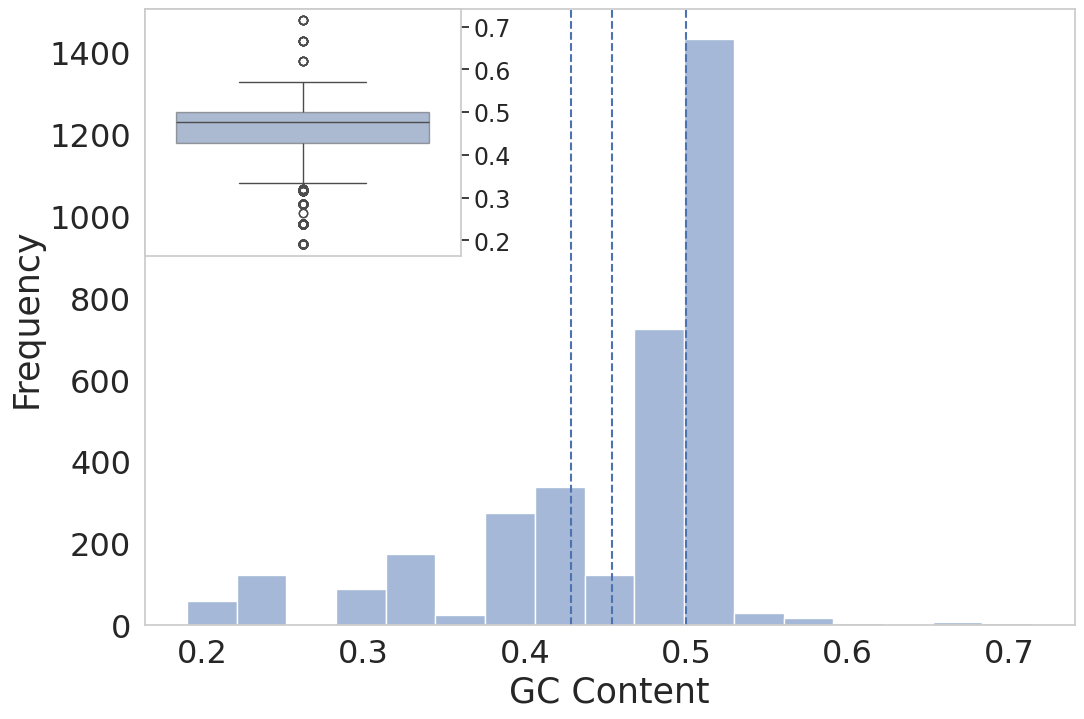

<ipython-input-71-62c18f5936da>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=17)


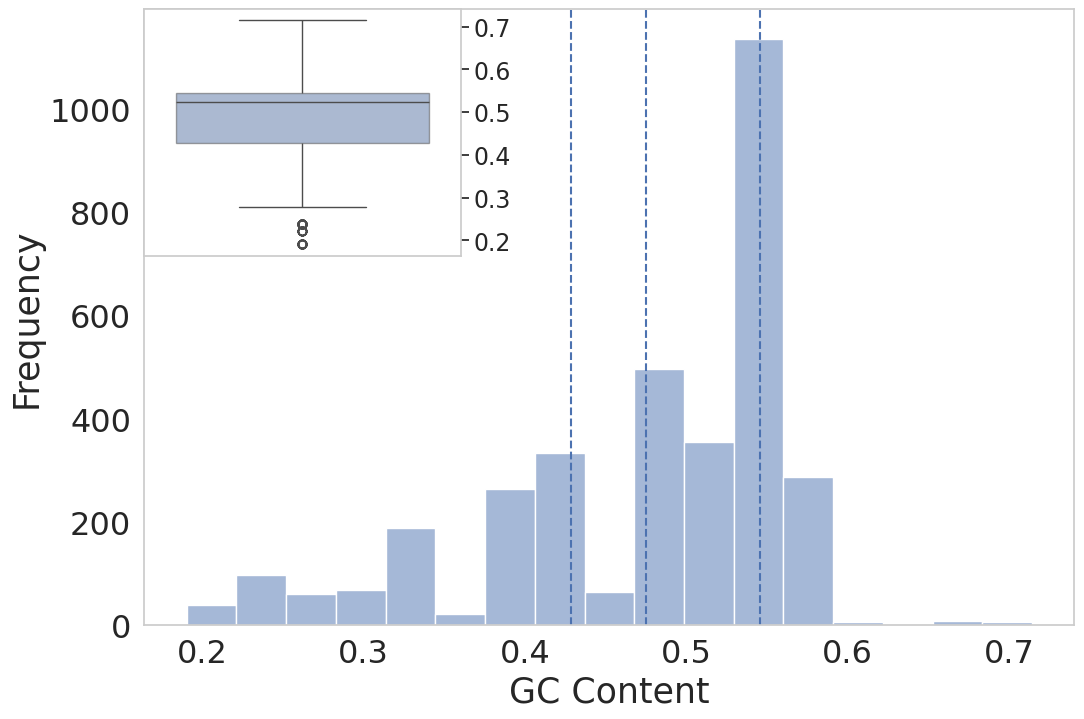

In [ ]:
# Анализ GC-состава
df = calculate_gc_content(data, seq_column_1)
df = calculate_gc_content(df, seq_column_2)
plot_gc_content_distribution(df, seq_column_1, 'GC_inSense.png')
plot_gc_content_distribution(df, seq_column_2, 'GC_inAntiSense.png')

In [ ]:
def plot_complementary_region_distribution(df, name):


    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'complementary_region_length')
    # Гистограмма
    variable = df['complementary_region_length']
    sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 1)
    des = df[x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)
    ax.tick_params(axis='both', labelsize=23)


    plt.title(f'')
    plt.xlabel('Complementary Region Length', fontsize=25)
    plt.ylabel('Frequency', fontsize=25)
    plt.savefig(f'{name}', dpi=1000)
    plt.show()


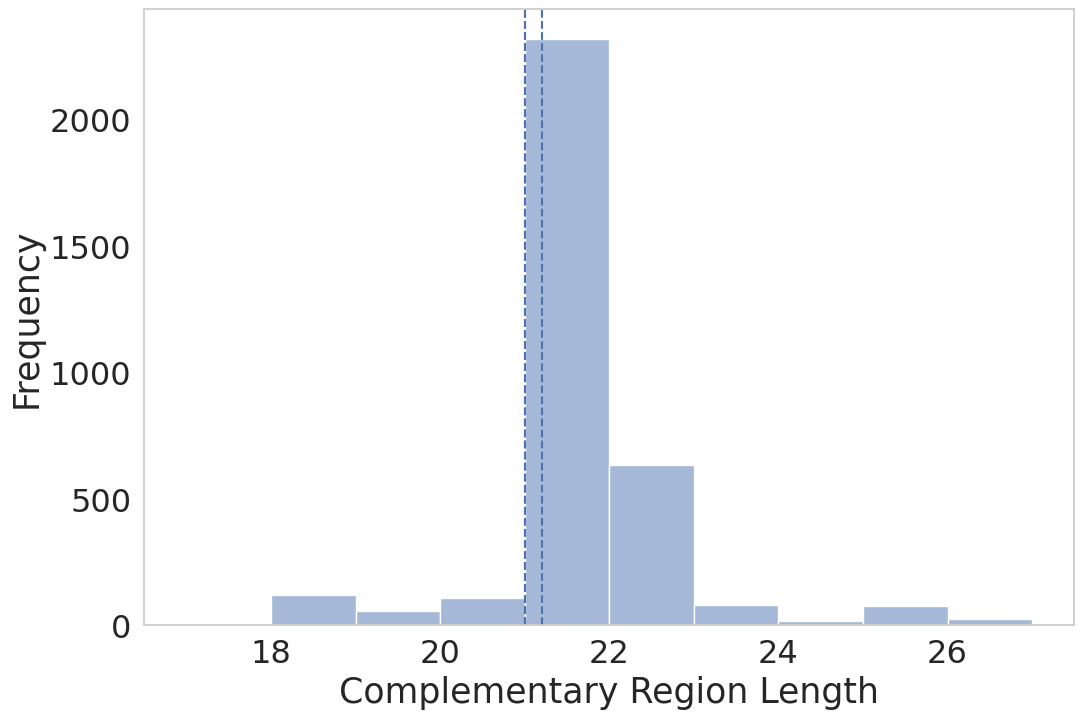

In [ ]:
# Анализ комплементарных участков
df = calculate_complementary_regions(df, seq_column_1, seq_column_2)
plot_complementary_region_distribution(df, 'complementary.png')

In [ ]:
data = pd.read_csv("/content/07-mod-mods_rewritten_final_cut.csv")
df = pd.read_csv("/content/final_data_before_getting_descriptors.csv")

data = data[data['SMDBid'].isin(df['SMDBid'])]
data
df = data

In [ ]:
# Напишем функцию которая считает количество модификаций в Sense и Antisense

import json

def count_mods(line: pd.Series, name: str):

    if name not in ("sense", "antisense"):
        raise Exception("name is to be either 'sense' or 'antisense'")

    mods_pos = json.loads(line[f"Position {name}"])
    mods_counter = 0
    for mods in mods_pos:
        mods_counter += len(mods)

    return mods_counter


def count_mods_in_column(df, column):

    if column not in ("sense", "antisense"):
        raise Exception("name is to be either 'sense' or 'antisense'")

    mods_counter_column = []
    for _, line in df.iterrows():
        mods_num = count_mods(line, name=column)
        mods_counter_column.append(mods_num)
    return mods_counter_column

# Добавим в датасет две колонки ModsNumberSense и ModsNumberAntisense
# count_mods(df.loc[1], "sense")
df["ModsNumberSense"] = count_mods_in_column(df, "sense")
df["ModsNumberAntisense"] = count_mods_in_column(df, "antisense")
df["ModsNumberSum"] =  df["ModsNumberSense"] + df["ModsNumberAntisense"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Функция для построения boxplot для двух колонок с количеством модификаций
def plot_modifications_boxplot(df, column_sense, column_antisense, title="Distribution of Modifications"):
    """
    Строит два boxplot'а на одном графике для количества модификаций
    в колонках Sense и Antisense.

    Аргументы:
    df -- DataFrame с данными
    column_sense -- название колонки для модификаций Sense
    column_antisense -- название колонки для модификаций Antisense
    title -- заголовок графика
    """
    # Создание DataFrame для графика
    data = pd.DataFrame({
        'Sense Modifications': df[column_sense],
        'Antisense Modifications': df[column_antisense]
    })

    # Преобразование данных в "длинный" формат для построения с помощью Seaborn
    data_melted = data.melt(var_name='Sequence Type', value_name='Modifications')

    # Построение boxplot
    plt.figure(figsize=(8, 6))
    plt.grid(False)
    sns.boxplot(x='Sequence Type', y='Modifications', data=data_melted, palette="Set2")

    # Добавление заголовка и меток осей
    plt.title(title, fontsize=14)
    plt.xlabel('Sequence Type', fontsize=10)
    plt.ylabel('Number of Modifications', fontsize=10)

    plt.show()

def plot_sum_modifications_boxplot(df, column_sum, title="Distribution of Modifications"):
    plt.figure(figsize = (12, 8))
    # Create a boxplot
    sns.boxplot(data=df, y=column_sum, boxprops=dict(alpha=.5))
    plt.grid(False)
    # Add title and labels
    plt.title("")
    plt.tick_params(axis='both', labelsize=23)
    plt.ylabel("Number of Modifications", fontsize=25)
    plt.savefig('num_modif.png', dpi=1200)
    # Show plot
    plt.show()


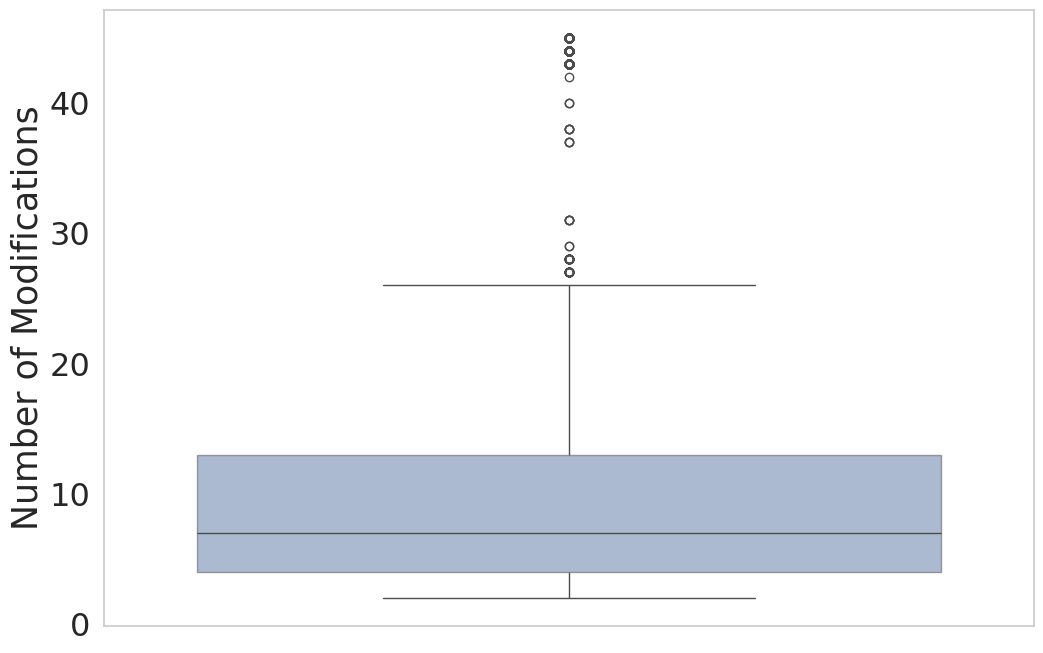

In [ ]:
plot_sum_modifications_boxplot(df, 'ModsNumberSum')

In [ ]:
data = pd.read_excel('/content//siRNAmod_db_parsed_concs (1).xlsx')
df = pd.read_csv("/content/final_data_before_getting_descriptors.csv")
data = data[data['SMDBid'].isin(df['SMDBid'])]
data

,SMDBid,Field1_links,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration,Efficacy,Trust,Reference,Field8_links
12,SM5317,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Methoxy...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,14,15,16,17,18 * 2,7,10,...",10 nM,40.77 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
13,SM5316,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,TATTTCACCATGATTTUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Deoxy* ...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,42.17 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
14,SM5315,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Hydroxy...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,44.11 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
15,SM5314,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Fluoro*...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,65.16 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
16,SM5313,http://crdd.osdd.net/servers/sirnamod/record.p...,AAAUCAUGGUGAAAUAAAAUU,UAUUUCACCAUGAUUUUU,Inverted abasic* 2-Deoxy* 2-Methoxy,5-phosphate ribose* Inverted abasic* 2-Fluoro*...,"1,21 * 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...","1 * 1 * 1,3,4,5,6,8,9,11,14,15,16 * 2,7,10,12,...",10 nM,60.4 percent target mRNA inhibition,NaN,22253019,http://www.ncbi.nlm.nih.gov/pubmed/22253019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,SM0005,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10 nM,81.4 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453
4890,SM0004,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10 nM,35.4 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453
4891,SM0003,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10 nM,54.2 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453
4892,SM0002,http://crdd.osdd.net/servers/sirnamod/record.p...,GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10 nM,76.8 percent target mRNA inhibition,NaN,19282453,http://www.ncbi.nlm.nih.gov/pubmed/19282453


In [ ]:
values_to_remove = ['SM4425', 'SM4421', 'SM4417', 'SM4413', 'SM4410', 'SM4406', 'SM4403', 'SM4399', 'SM4396', 'SM4394', 'SM4393', 'SM4389', 'SM4387', 'SM4384', 'SM4381', 'SM4379', 'SM4378', 'SM4374', 'SM4372', 'SM3275', 'SM3274', 'SM3273', 'SM3267', 'SM3266', 'SM3265', 'SM3261', 'SM3260', 'SM3259', 'SM3253', 'SM3252', 'SM3251', 'SM3247', 'SM3246', 'SM3245', 'SM3243', 'SM3242', 'SM3239', 'SM3238', 'SM3237', 'SM3233', 'SM3232', 'SM2887', 'SM2886', 'SM2885', 'SM2884', 'SM2883', 'SM2882', 'SM2881', 'SM2880', 'SM2879', 'SM2878', 'SM2877', 'SM2876', 'SM2875', 'SM2874', 'SM2873', 'SM2872', 'SM2871', 'SM2870', 'SM2869', 'SM2867', 'SM2866', 'SM2865', 'SM2864', 'SM2863', 'SM2862', 'SM2861', 'SM2860', 'SM2859', 'SM2858', 'SM2857', 'SM2856', 'SM2855', 'SM2854', 'SM2853', 'SM2852', 'SM2851', 'SM2850', 'SM2849']
data = data[~data['SMDBid'].isin(values_to_remove)]

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import pandas as pd

# Define RNA complementarity scoring
def get_rna_complementarity_matrix():
    # Complementary base pairs with a score of +1
    complementary_pairs = {
        ('A', 'U'): 1,
        ('U', 'A'): 1,
        ('C', 'G'): 1,
        ('G', 'C'): 1,
        ('A', 'T'): 1, # Добавляем пару A-T
        ('T', 'A'): 1, # Добавляем пару T-A
    }

    # All possible RNA nucleotides
    nucleotides = ['A', 'U', 'C', 'G', 'T'] # Добавляем тимин (T)

    # Initialize substitution matrix with mismatches penalized by -1
    substitution_matrix = {}
    mismatch_penalty = -1

    for n1 in nucleotides:
        for n2 in nucleotides:
            if (n1, n2) in complementary_pairs:
                substitution_matrix[(n1, n2)] = complementary_pairs[(n1, n2)]
            else:
                substitution_matrix[(n1, n2)] = mismatch_penalty

    return substitution_matrix

# Sample RNA sequences
# Sample RNA sequences
seq1 = "AUGCUUAGC"
seq2 = "GCAAGCAUU"

# Get the substitution matrix
subs_matrix = get_rna_complementarity_matrix()

# Gap penalties
gap_open = -2
gap_extend = -0.5

# Пример использования:
df = pd.DataFrame({
    'SMDBid': data['SMDBid'].to_list(),
    'sense': data['siRNA sense'].to_list(),
    'antisense': data['siRNA antisense'].to_list()
})

complementary_smdbid = []
non_complementary_smdbid = []

for i in range(len(df)):
    sense_seq = df['sense'][i]
    antisense_seq = df['antisense'][i]

    # Проверка на наличие нестандартных символов
    if any(char not in 'AUGCT' for char in sense_seq + antisense_seq): # Проверяем на 'AUGCT'
        skipped_rows = df[df.apply(lambda row: any(char not in 'AUGCT' for char in row['sense'] + row['antisense']), axis=1)]
        print(skipped_rows)
        continue  # Пропускаем строку, если есть нестандартные символы

    # Perform local alignment
    alignments = pairwise2.align.localds(sense_seq, antisense_seq, subs_matrix, gap_open, gap_extend)
    best_alignment = alignments[0]
    aligned_seq1, aligned_seq2, score, start, end = best_alignment

    # Count mismatches
    mismatches = 0
    for base1, base2 in zip(aligned_seq1, aligned_seq2):
        if base1 != '-' and base2 != '-':
            if subs_matrix[(base1, base2)] < 1:
                mismatches += 1

    # Считаем последовательность комплементарной, если мисматчей меньше 2
    if mismatches < 2:
        complementary_smdbid.append(df['SMDBid'][i])
    else:
        non_complementary_smdbid.append(df['SMDBid'][i])

print(f"Комплементарные SMDBid: {complementary_smdbid}")
print(f"Некомплементарные SMDBid: {non_complementary_smdbid}")


Комплементарные SMDBid: ['SM5287', 'SM5286', 'SM5285', 'SM5284', 'SM5283', 'SM5282', 'SM5281', 'SM5280', 'SM5279', 'SM5278', 'SM5277', 'SM5276', 'SM5275', 'SM5274', 'SM5273', 'SM5272', 'SM5271', 'SM5270', 'SM5269', 'SM5268', 'SM5267', 'SM5266', 'SM5265', 'SM5264', 'SM5263', 'SM5262', 'SM5261', 'SM5260', 'SM5259', 'SM5258', 'SM5107', 'SM5106', 'SM5105', 'SM5104', 'SM5103', 'SM5102', 'SM5101', 'SM5100', 'SM5099', 'SM5098', 'SM5097', 'SM5096', 'SM5095', 'SM5094', 'SM5093', 'SM5092', 'SM5091', 'SM5090', 'SM5089', 'SM5088', 'SM5087', 'SM5086', 'SM5085', 'SM5084', 'SM5083', 'SM5082', 'SM5081', 'SM5080', 'SM5079', 'SM5078', 'SM4759', 'SM4748', 'SM4439', 'SM4210', 'SM4209', 'SM4208', 'SM4178', 'SM4177', 'SM4176', 'SM4154', 'SM4153', 'SM4152', 'SM4130', 'SM4129', 'SM4128', 'SM4118', 'SM4117', 'SM4116', 'SM4070', 'SM4069', 'SM4068', 'SM4022', 'SM4021', 'SM4020', 'SM4018', 'SM4017', 'SM4016', 'SM3962', 'SM3961', 'SM3960', 'SM3906', 'SM3905', 'SM3904', 'SM3814', 'SM3813', 'SM3812', 'SM3714', 'SM37

In [ ]:
print(len(complementary_smdbid))
print(len(non_complementary_smdbid))

142
3293


In [ ]:
data = pd.read_csv('/content/final_data_before_getting_descriptors.csv')

Eficacy mismatch effect

<ipython-input-45-7b1695993fbf>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=16)


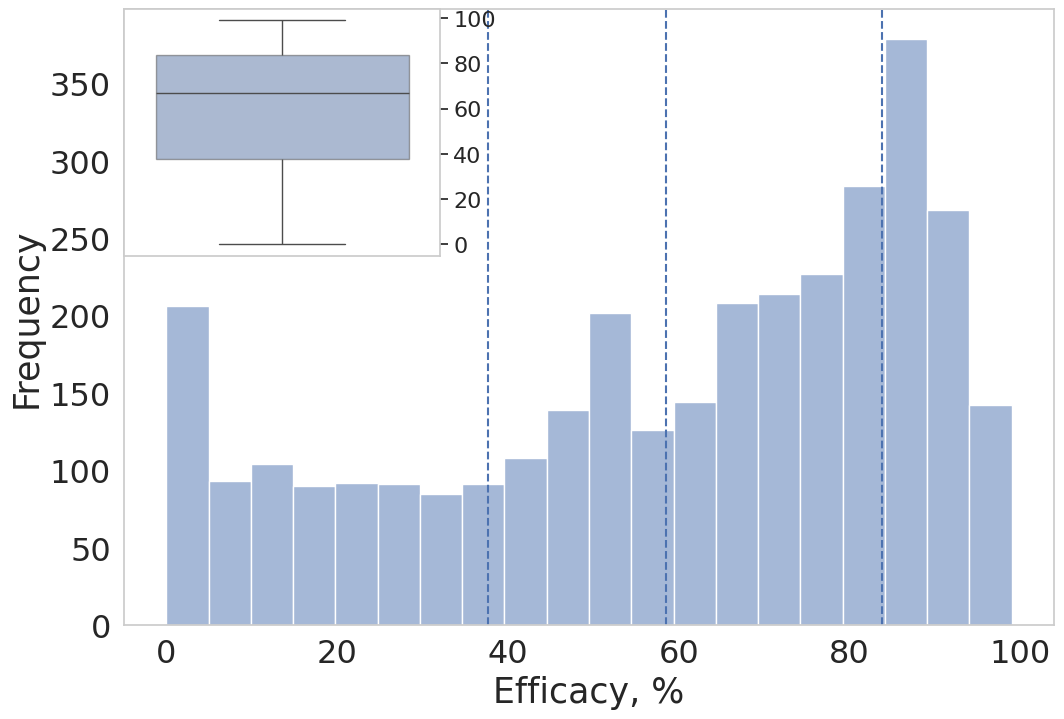

In [ ]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8), sharex=False, sharey=False)

    x = str(f'Efficacy, %')
    # Гистограмма
    variable = data[data['SMDBid'].isin(non_complementary_smdbid)][x].fillna(data[data['SMDBid'].isin(non_complementary_smdbid)][x].mean())
    sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 5)
    des = data[data['SMDBid'].isin(non_complementary_smdbid)][x].describe()
    ax.axvline(des["25%"], ls='--')
    ax.axvline(des["mean"], ls='--')
    ax.axvline(des["75%"], ls='--')
    ax.grid(False)

    ax.tick_params(axis='both', labelsize=23)
    # Бокс-плот (inset)
    ax_inset = plt.gca().inset_axes([0., 0.6, 0.34, 0.4])

    sns.boxplot(data[data['SMDBid'].isin(non_complementary_smdbid)][f'Efficacy, %'], ax=ax_inset, boxprops=dict(alpha=.5))
    ax_inset.set_yticklabels(ax_inset.get_yticklabels(), fontsize=16)
    ax_inset.yaxis.set_label_position("right")
    ax_inset.yaxis.tick_right()
    ax_inset.set_ylabel(f'', fontsize=19)
    ax_inset.grid(False)
    ax_inset.set_title("")

    plt.title(f'')
    plt.xlabel('Efficacy, %' , fontsize=25)
    plt.ylabel('Frequency' , fontsize=25)

    plt.savefig(f'Efficacy1, %', dpi=1000)
    plt.show()

In [ ]:
df = pd.read_csv("E:\\My_projects\\figures\\final_data_before_getting_descriptors.csv")
data = pd.read_csv('\content\modif_correct1 (1).csv')
data = data[data['SMDBid'].isin(df['SMDBid'])]
data

In [ ]:
import plotly.express as px
import pandas as pd
import kaleido
# Подсчет количества значений для каждой категории
value_counts = data[''].value_counts() #categorical variable

# Получение топ-4 и остальных значений
top_categories = value_counts[:3]
other_count = value_counts[3:].sum()  # Суммируем остальные значения

# Создаем новую категорию "Другие"
labels = list(top_categories.index) + ['Others']
sizes = list(top_categories.values) + [other_count]
colors = ['#594157', '#726DA8', '#7D8CC4', '#A0D2DB', '#BEE7E8']

# Создание DataFrame для Plotly
df = pd.DataFrame({'Category': labels, 'Count': sizes})

# Построение круговой диаграммы
fig = px.pie(df, values='Count', names='Category',
             color_discrete_sequence=colors,
             title='')  # Для создания донат-диаграммы, если нужно

# Настройка отображения процентов и легенды
fig.update_traces(textinfo='percent', textfont=dict(size=33), showlegend=True)
fig.update_layout(
    legend=dict(
        orientation="v",  # Вертикальное расположение
        yanchor="middle",  # Вертикальное выравнивание
        y=0.5,  # Положение по оси Y (0 - низ, 1 - верх)
        xanchor="left",  # Горизонтальное выравнивание
        x=1  # Положение по оси X (1 - вправо от графика)
    ),
    width=1200,  # Ширина графика
    height=800,
    font=dict(size=30)# Высота графика
)

# Показать график
fig.show()

fig.write_image("E:\\My_projects\\figures\\pie_chart.png", scale=8)